In [1]:
import numpy as np
import pandas as pd
import scanpy as sc


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import sklearn.decomposition, sklearn.cluster
from nheatmap import nhm, scripts
import matplotlib.pyplot as plt
import matplotlib as mpl


import os

#For editable text. Except latex text is still shapes
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

#Set style
sns.set(style = "whitegrid", palette="pastel", color_codes=True)

np.random.seed(229)


from scipy.stats import mannwhitneyu

In [2]:
figSavePath = "/Users/kayaneh/Documents/deconvolution/figures/full_figure/maintext_revision1/"

In [3]:
os.getcwd()

'/Users/kayaneh/Documents/deconvolution/fig2_revision_git_private'

In [4]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300, bbox_inches = 'tight', transparent = True)

In [5]:
colors = ["#F25E74",  "#026178", "#34A1C7",  "#BE0D73", "#FC9E5B", "#F96E61", "#34A1C7"]
color_pal = sns.color_palette(colors)
color_pal

[(0.9490196078431372, 0.3686274509803922, 0.4549019607843137),
 (0.00784313725490196, 0.3803921568627451, 0.47058823529411764),
 (0.20392156862745098, 0.6313725490196078, 0.7803921568627451),
 (0.7450980392156863, 0.050980392156862744, 0.45098039215686275),
 (0.9882352941176471, 0.6196078431372549, 0.3568627450980392),
 (0.9764705882352941, 0.43137254901960786, 0.3803921568627451),
 (0.20392156862745098, 0.6313725490196078, 0.7803921568627451)]

In [6]:
tiss_pal = {"Rest": "#165BAA",
         "Liver": "#F25E74",
         "Kidney Cortex": "#6DBBDF",
         "Testis": "#BE0D73",
         "Brain": "#34A1C7"}

cell_pal = {"Proximal tubule": tiss_pal["Kidney Cortex"],
           "Hepatocyte": tiss_pal["Liver"]}

In [7]:
brainPath = "/Users/kayaneh/Documents/deconvolution/brain/"
liverPath = "/Users/kayaneh/Documents/deconvolution/livertox/"

In [8]:
import os
os.getcwd()

'/Users/kayaneh/Documents/deconvolution/fig2_revision_git_private'

In [9]:
liver = pd.read_csv("../signatures_git/gini6_perCluster_liver_12102020.csv",
                   index_col = 0)

kidney = pd.read_csv("../signatures_git/gini6_perCluster_kidney_12072020.csv",
                   index_col = 0)

brain = pd.read_csv("../signatures_git/gini6_perCluster_brain_NORMAL_01212021.csv",
                   index_col = 0)

heart = pd.read_csv("../signatures_git/gini6_perCluster_heart_03112021.csv",
                   sep = ",", index_col = 0)

In [10]:
heartSig = pd.read_csv("../signatures_git/heartGenes_forCIS_03152021.csv",
                      sep = ",", index_col = 0).T

livertoxpath = "/Users/kayaneh/documents/deconvolution/livertox/"

kidneySig = pd.read_csv("../signatures_git/kidneyGenes_forCIS_01042020.csv", 
                        index_col = 0).T
placentaSig = pd.read_csv("../signatures_git/placenta_signature_forCIS_UNITED-TIECH-HEMANT_010120201.csv",
                         index_col = 0).T
liverSig = pd.read_csv("../signatures_git/liverGenes_forCIS_12102020.csv",
                      index_col = 0).T


brainpath = "/Users/kayaneh/documents/deconvolution/alzheimers/"
brainSig = pd.read_csv( brainpath + "brainGenes_forCIS_NORMAL_01212021.csv",
                      index_col = 0).T

allTissSigs = [liverSig,kidneySig, brainSig, heartSig,placentaSig ]
for tissSig in allTissSigs:
    for cellInTiss in tissSig:
        print(cellInTiss, len(tissSig[cellInTiss].dropna()))
    print("")

EPCAM+ bile duct cells-gini 1
Hepatocytes-gini 144
LSEC-gini 6
MVEC-gini 1

Connecting tubule-gini 1
Epithelial progenitor cell-gini 2
Intercalated cell-gini 9
Pelvic epithelium-gini 1
Podocyte-gini 5
Principal cell-gini 3
Proximal tubule-gini 47
Thick ascending limb of Loop of Henle-gini 4

Ast-gini 22
Ex-gini 70
In-gini 8
Mic-gini 2
Oli-gini 25
Opc-gini 24

Adipocytes-gini 2
Atrial_Cardiomyocyte-gini 7
Mesothelial-gini 2
Pericytes-gini 1
Ventricular_Cardiomyocyte-gini 6

EVT 10
SCT 6



In [11]:
allTissGiniDF = [liver, kidney, brain, heart]
for tissGiniDF in allTissGiniDF:
    for col in tissGiniDF:
        print(col, len(tissGiniDF[col].dropna().tolist()))
    print("")

EPCAM+ bile duct cells-gini 1
Hepatocytes-gini 144
LSEC-gini 6
MVEC-gini 1

Connecting tubule-gini 1
Epithelial progenitor cell-gini 2
Intercalated cell-gini 9
Pelvic epithelium-gini 1
Podocyte-gini 5
Principal cell-gini 3
Proximal tubule-gini 47
Thick ascending limb of Loop of Henle-gini 4

Ast-gini 22
Ex-gini 70
In-gini 8
Mic-gini 2
Oli-gini 25
Opc-gini 24

Adipocytes-gini 2
Atrial_Cardiomyocyte-gini 7
Mesothelial-gini 2
Pericytes-gini 1
Ventricular_Cardiomyocyte-gini 6



In [12]:
def updateDEGDict(allDEGDict, giniDF):
    for i in giniDF:
        cellName = i.split("-")[0]
        geneList = giniDF[i].dropna().index.tolist()
        if len(geneList) > 1:
            allDEGDict[i] = geneList
    return(allDEGDict)

In [13]:
# make a dictionary carrying all the degs for all the cell types
# then go through and get the sums locally

allDEGDict = {}
allDEGDict = updateDEGDict(allDEGDict, liver)
allDEGDict = updateDEGDict(allDEGDict, brain)
allDEGDict = updateDEGDict(allDEGDict, kidney)
allDEGDict = updateDEGDict(allDEGDict, heart)

# average technical replicates per biological replicate

In [14]:

# this is the april TMM of the 5 biological replicates
#aprilTMM = pd.read_csv("../fig1_git/epoAprilCPMTMM_04092021.csv",
#                       sep = ",", index_col = 0)

adBase = "/Users/kayaneh/Documents/deconvolution/alzheimers/remapped_unstranded/"

ctsPath = adBase + "allNCI_biologReplicates_postQC_cpmTMMPlasmaVol_unstrandedTS3_09022021.csv"

cts = pd.read_csv(ctsPath, index_col = (0,1) )

aprilTMM = np.log(cts + 1)
aprilTMM.columns = [int(i) for i in aprilTMM.columns]

"""# get the average expression of the genes
biologRepGeneAvgs = pd.DataFrame()
for biologRep in allHealthyReplicates:
    technicalReplicates = allHealthyReplicates[biologRep]
    avgGeneCtsAcrossReps = aprilTMM[technicalReplicates].mean(axis = 1).to_frame()
    avgGeneCtsAcrossReps.columns = [biologRep]
    biologRepGeneAvgs = pd.concat([avgGeneCtsAcrossReps, biologRepGeneAvgs], 
                                  axis = 1)

"""

# drop the rows that are all zero
biologRepGeneAvgs = aprilTMM
biologRepGeneAvgs = biologRepGeneAvgs[(biologRepGeneAvgs.T != 0).any()]

In [15]:
adMeta = pd.read_csv(adBase + "allAD_metadata_FINAL.csv",
                    sep = ",", index_col = 0)
adMeta["Isolate"] = [int(i) for i in adMeta["Isolate"]]
adMeta = adMeta[adMeta["Isolate"].isin(aprilTMM.columns)]

In [16]:
#kentuckyIsolateID = np.unique(adMeta[adMeta["Center"] == "University of Kentucky"].index.tolist())
kentuckyIsolateID = np.unique(adMeta[adMeta["Center"] == "BioIVT"].index.tolist())

In [17]:
biologRepGeneAvgs.reset_index(inplace = True)
biologRepGeneAvgs.set_index("gene_num", inplace = True)
biologRepGeneAvgs.drop("gene_name", axis = "columns", inplace = True)

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
len(kentuckyIsolateID)

18

In [19]:
biologRepGeneAvgs = biologRepGeneAvgs[kentuckyIsolateID]

In [20]:
biologRepGeneAvgs.shape

(33500, 18)

# now do the CIS

In [21]:
cisDF = pd.DataFrame()
np.random.randint(229)
for i in allDEGDict:
    geneList = allDEGDict[i]
    intersection = np.intersect1d(geneList, biologRepGeneAvgs.index.tolist())
    missing = np.setdiff1d(geneList, biologRepGeneAvgs.index.tolist())
    
    inCF = biologRepGeneAvgs.loc[intersection].sum(axis = 0).to_frame()
    cellName = i.split("-")[0]
    inCF.columns = [cellName]
    

    cisDF = pd.concat([cisDF, inCF], axis = 1)

cisDF = cisDF.T


In [22]:
cisDF

,17923,17924,17925,17926,17927,17929,17931,17932,17933,17934,17938,17940,17943,17944,17946,17947,17949,17953
Hepatocytes,131.096679,93.425616,109.472905,84.468517,109.404668,96.069495,87.877233,106.225265,164.716483,122.181597,82.605999,123.739475,97.550400,96.559329,110.111303,148.983973,94.073861,109.574588
LSEC,10.600296,8.117397,12.399107,8.988537,12.593597,10.898655,9.942958,16.555669,3.292156,6.203212,11.370274,19.349175,3.522391,10.170066,14.055422,10.930000,15.507430,7.117736
Ast,14.564226,16.254770,20.925835,14.789400,15.646875,20.492475,15.441249,24.097547,22.786046,23.907101,22.475768,23.034857,28.045477,17.706571,26.289729,27.470629,18.156095,18.911645
Ex,60.885084,67.085238,69.243877,56.091205,63.370299,73.323364,65.935409,84.358869,70.154067,59.444269,80.145296,74.991021,80.577684,83.262142,91.348891,70.389596,83.497904,72.041712
In,7.308013,7.198574,5.625108,6.212588,6.431502,6.545206,6.188760,7.261391,5.410421,7.340932,8.362696,6.623842,7.251781,9.328206,13.027187,6.170821,14.884626,4.568044
Mic,7.122575,7.030483,8.729153,7.889306,6.621074,6.843182,7.855474,10.055584,2.830986,7.321577,7.132668,7.548720,8.137174,7.252153,8.133508,7.355834,7.471609,6.586045
Oli,24.871685,25.129081,27.386986,24.355726,24.909284,29.509414,28.781568,31.767127,25.740419,25.103656,28.052390,32.307572,32.905388,23.799520,34.081925,32.547077,41.244001,32.998263
Opc,9.108450,9.440471,9.104301,7.547242,12.479452,13.760219,6.403525,15.326209,23.263779,13.910823,5.979283,12.393121,15.386971,16.166664,18.647502,15.151776,22.997565,13.177423
Epithelial progenitor cell,0.158761,0.000000,0.000000,0.176039,0.000000,0.391661,0.912527,0.000000,1.097035,2.164378,1.149323,0.000000,3.974017,1.467311,1.358984,2.152933,0.872529,0.000000
Intercalated cell,5.859514,5.476899,4.913488,5.314934,3.120619,4.773347,2.893973,5.450118,4.137951,5.369962,5.424254,3.880777,6.026626,6.690678,6.076201,5.873276,7.142997,2.829433


In [23]:
cisDF["celltype"] = cisDF.index

In [24]:
cisDF = cisDF[cisDF["celltype"] != "Mic"]

In [25]:
meltedCIS = cisDF.melt(value_vars = cisDF.columns[:-1], id_vars = ["celltype"])

In [26]:
# eliminate microglia; inadequate # of marker genes 
meltedCIS = meltedCIS[meltedCIS["celltype"]!= "Mic"]

In [27]:
goodCells = ['Ast', 'Ex', 'In','Oli','Opc',
             'Hepatocytes',
             'Atrial_Cardiomyocyte',
             'Ventricular_Cardiomyocyte']

goodCells = ['Ast', 'Ex', 'In','Oli','Opc',
             'Hepatocytes']
             #'Atrial_Cardiomyocyte',
             #'Ventricular_Cardiomyocyte']
        
goodCells = ['Ast', 'Ex', 'In','Oli','Opc']

In [28]:
meltSubset = meltedCIS[meltedCIS["celltype"].isin(goodCells)]

In [29]:
celltype_pal = {'Ast': '#96C9DC',
 'Ex': '#fb5607',
 'In': '#ff006e',
 'Oli': '#8338ec',
 'Opc': '#3a86ff',
'Hepatocytes': '#8A1C7C',
'Ventricular_Cardiomyocyte': '#62b6cb', 
'Atrial_Cardiomyocyte': '#5fa8d3'}

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Signature Score')

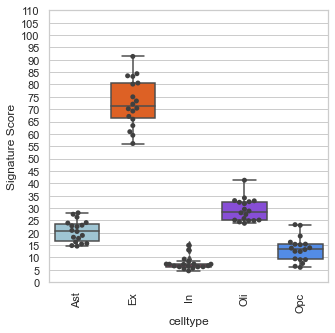

In [31]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = meltSubset, x = "celltype", y = "value", 
            palette = celltype_pal)
sns.swarmplot(data = meltSubset, x = "celltype", y = "value",
             color = "0.25")
plt.ylim(0,110);
plt.yticks(np.arange(0,115,5))
plt.xticks(rotation = "90");
plt.ylabel("Signature Score")
#save_figure_pdf(plt, figSavePath + "liverBrainHeart_CIS_together_03222021.pdf")

In [32]:
meltSubset["log(value)"] = np.log(meltSubset["value"])

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
meltSubset.sort_values(by = "log(value)", ascending = False, inplace = True)

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


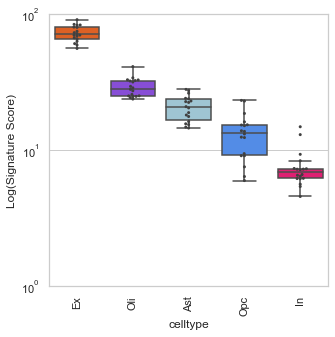

In [35]:
plt.figure(figsize = (5, 5))
plt.semilogy()
sns.boxplot(data = meltSubset, x = "celltype", y = "value", 
            palette = celltype_pal, fliersize = 0, order = ["Ex", "Oli", "Ast", "Opc", "In"])
sns.swarmplot(data = meltSubset, x = "celltype", y = "value",
             color = "0.25", size = 3, order = ["Ex", "Oli", "Ast", "Opc", "In"])


plt.ylim(10 ** 0, 10 ** 2);
#plt.yticks(np.arange(-2,6,1))
plt.xticks(rotation = "90");
plt.ylabel("Log(Signature Score)")
save_figure_pdf(plt, "brain_bioIVT_NCI_CIS_together_LOGGEDSIGSCORE_11302021.pdf")
#save_figure_pdf(plt, figSavePath + "liverBrain_kyNCI_CIS_together_LOGGEDSIGSCORE_09052021.pdf")

In [37]:
import os
os.getcwd()

'/Users/kayaneh/Documents/deconvolution/fig2_revision_git_private'

In [34]:
clear all